#Using keras and Tensorflow

In [ ]:
#keras model
#Activation Function
#Loss Function
#Optimizer

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

In [ ]:
#load dataset
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest[1]

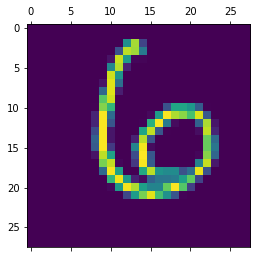

In [ ]:
plt.matshow(xtest[100])

In [ ]:
#normalize data
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
xtest[1]

In [ ]:
xtrain = xtrain.reshape(-1, (28*28))
xtest = xtest.reshape(-1, 784)

In [ ]:
xtrain[100].shape

(784,)

In [ ]:
#build the model
#sequential
#3 layers, first 2 layers 64 neuron and relu function
#output layer 10 neuron and softmax function

model = keras.Sequential()
model.add(Dense(64, activation='relu', input_dim=784)) #input layer
model.add(Dense(64, activation='relu')) #hidden layer
model.add(Dense(10, activation='softmax')) #output layer

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
#train the model
model.fit(xtrain,
          to_categorical(ytrain),
          epochs = 10,
          batch_size = 32,
          )

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4882 - accuracy: 0.8605
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1256 - accuracy: 0.9623
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0711 - accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0554 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0440 - accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0405 - accuracy: 0.9867
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0347 - accuracy: 0.9889
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0289 - accuracy: 0.9906
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.023

In [ ]:
#evaluate the model
model.evaluate(xtest, to_categorical(ytest))

313/313 [==============================] - 0s 958us/step - loss: 0.1003 - accuracy: 0.9749


[0.10030151158571243, 0.9749000072479248]

In [ ]:
pred = model.predict(xtest)
pred

array([[2.44733400e-10, 8.92067236e-12, 6.61985222e-09, ...,
        1.00000000e+00, 1.93988908e-10, 6.01788663e-09],
       [2.14140641e-12, 9.46737444e-09, 1.00000000e+00, ...,
        8.03311171e-16, 3.82323383e-12, 7.01186116e-19],
       [3.14182842e-07, 9.99411464e-01, 1.46111815e-05, ...,
        6.53082998e-06, 5.31930360e-04, 1.34227163e-08],
       ...,
       [8.56993174e-14, 1.00599325e-14, 2.22928865e-15, ...,
        1.49841846e-08, 1.53206858e-09, 2.90557455e-06],
       [1.18926551e-14, 7.67737002e-13, 7.60025194e-17, ...,
        6.18069745e-12, 6.57876399e-07, 9.72184843e-14],
       [2.48751963e-10, 6.29010563e-15, 7.80049723e-12, ...,
        7.83200875e-17, 4.46580793e-12, 2.16552680e-14]], dtype=float32)

In [ ]:
np.argmax(pred[100])

6

Text(69.0, 0.5, 'truth Values')

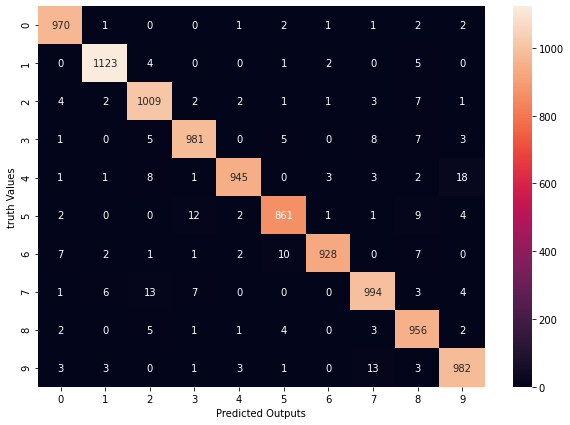

In [ ]:
y_pred = model.predict(xtest)
ypred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=ytest, predictions=ypred)
plt.figure(figsize=(10, 7))
seaborn.heatmap(con_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('truth Values')